In [3]:
#Question 1

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

tesla=yf.Ticker('TSLA')
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [4]:
#Question 2


import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

beautiful_soup = BeautifulSoup(html_data, "html.parser")

tables = beautiful_soup.find_all("table")
table_index = None

for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if table_index is not None:
    rows = tables[table_index].find_all('tr')
    
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all("td")
        if cols:
            date = cols[0].text
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.head()


Empty DataFrame
Columns: [Date, Revenue]
Index: []

In [5]:
# Question 3


GameStop=yf.Ticker('GME')
gme_data=GameStop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)


Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [9]:
# Question 4


import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

beautiful_soup = BeautifulSoup(html_data, "html.parser")

tables = beautiful_soup.find_all("table")
table_index = None

for index, table in enumerate(tables):
    if "GameStop Revenue" in str(table):
        table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if table_index is not None:
    rows = tables[table_index].find_all('tr')
    
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all("td")
        if cols:
            date = cols[0].text
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue.head()



Empty DataFrame
Columns: [Date, Revenue]
Index: []

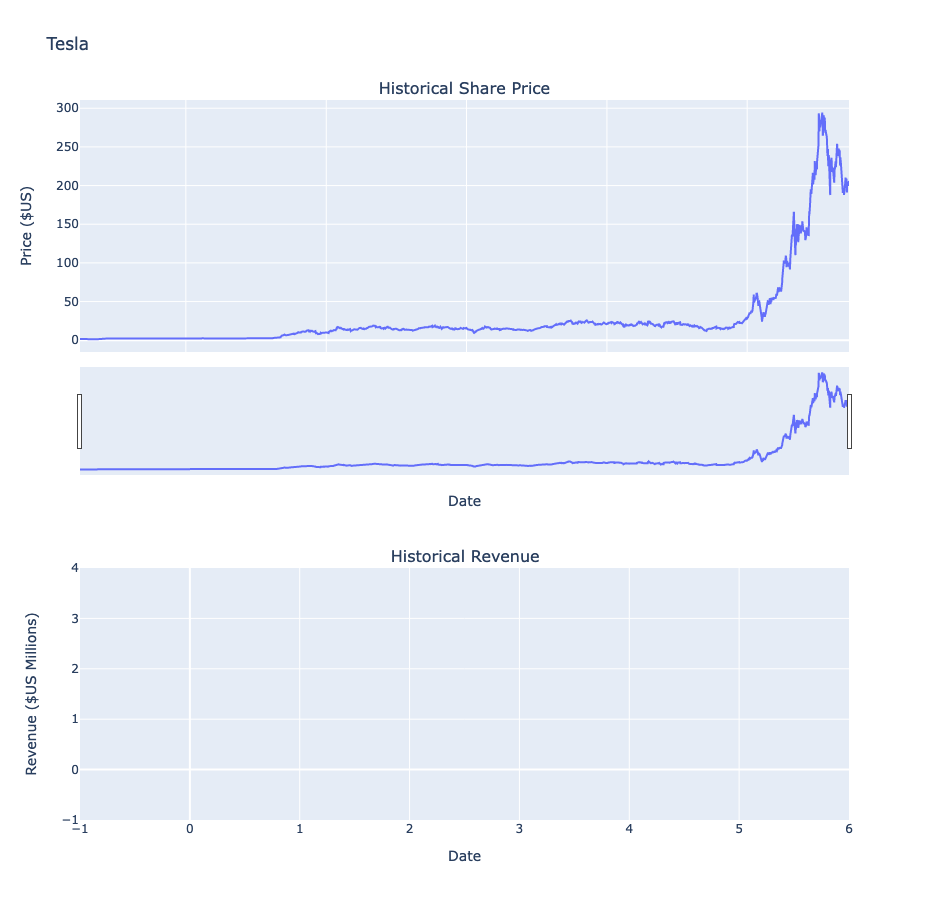

In [13]:
# Question 5

make_graph(tesla_data, tesla_revenue, 'Tesla')

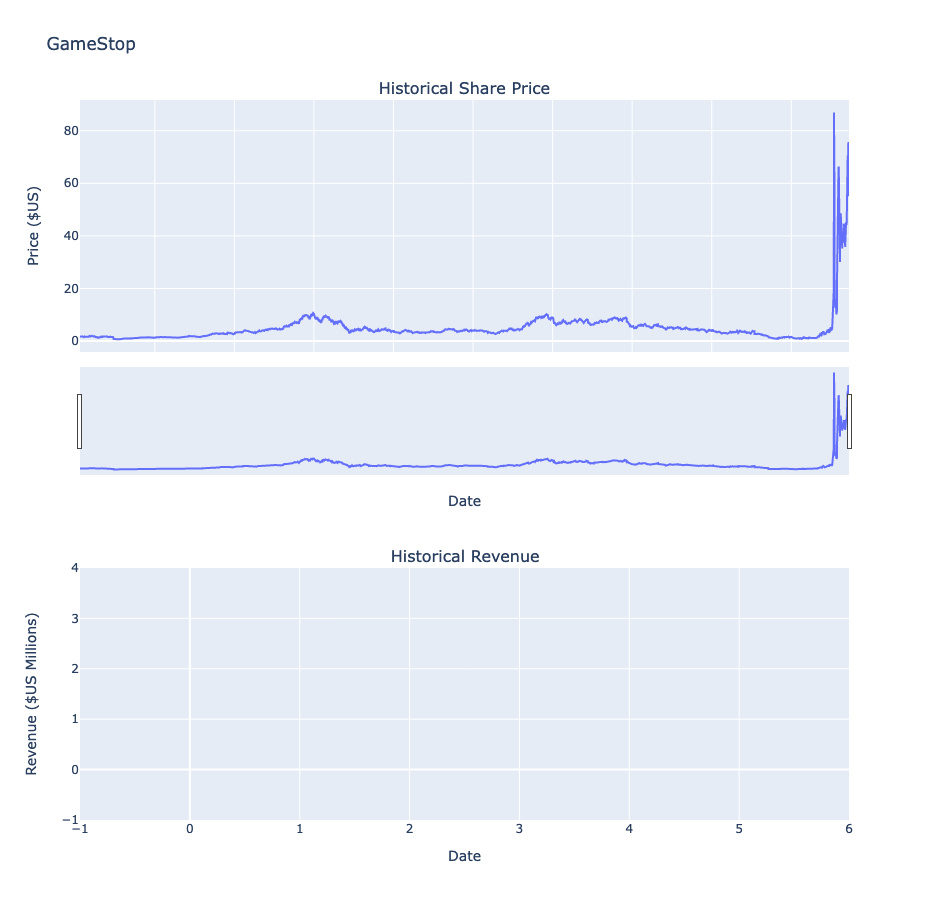

In [14]:
# Question 6

make_graph(gme_data, gme_revenue, 'GameStop')